# Logistic regression

Classification problem - yes or no, sale or no sale 

A logistic regeession reveals the relationship between a discrete (separate and distinct, yes or no?) dependent variable and at least one independent variable

# y_i = e^a+bX / 1 + e^a+bX + error

#### "For each X unit increase, the probability of Y hapening increases by exp(b) - 1 * 100%" e.g. if coefficient b = 0.5, then for each unit increase in X will increase the probability of Y by 64%"

In [64]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [65]:
df = pd.read_csv('spam.csv')
df.head(1)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.0,0.778,0.0,0.0,0.0,y


# Data analysis

In [66]:
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<AxesSubplot:title={'center':'crl.tot'}>,
        <AxesSubplot:title={'center':'dollar'}>],
       [<AxesSubplot:title={'center':'bang'}>,
        <AxesSubplot:title={'center':'money'}>],
       [<AxesSubplot:title={'center':'n000'}>,
        <AxesSubplot:title={'center':'make'}>]], dtype=object)

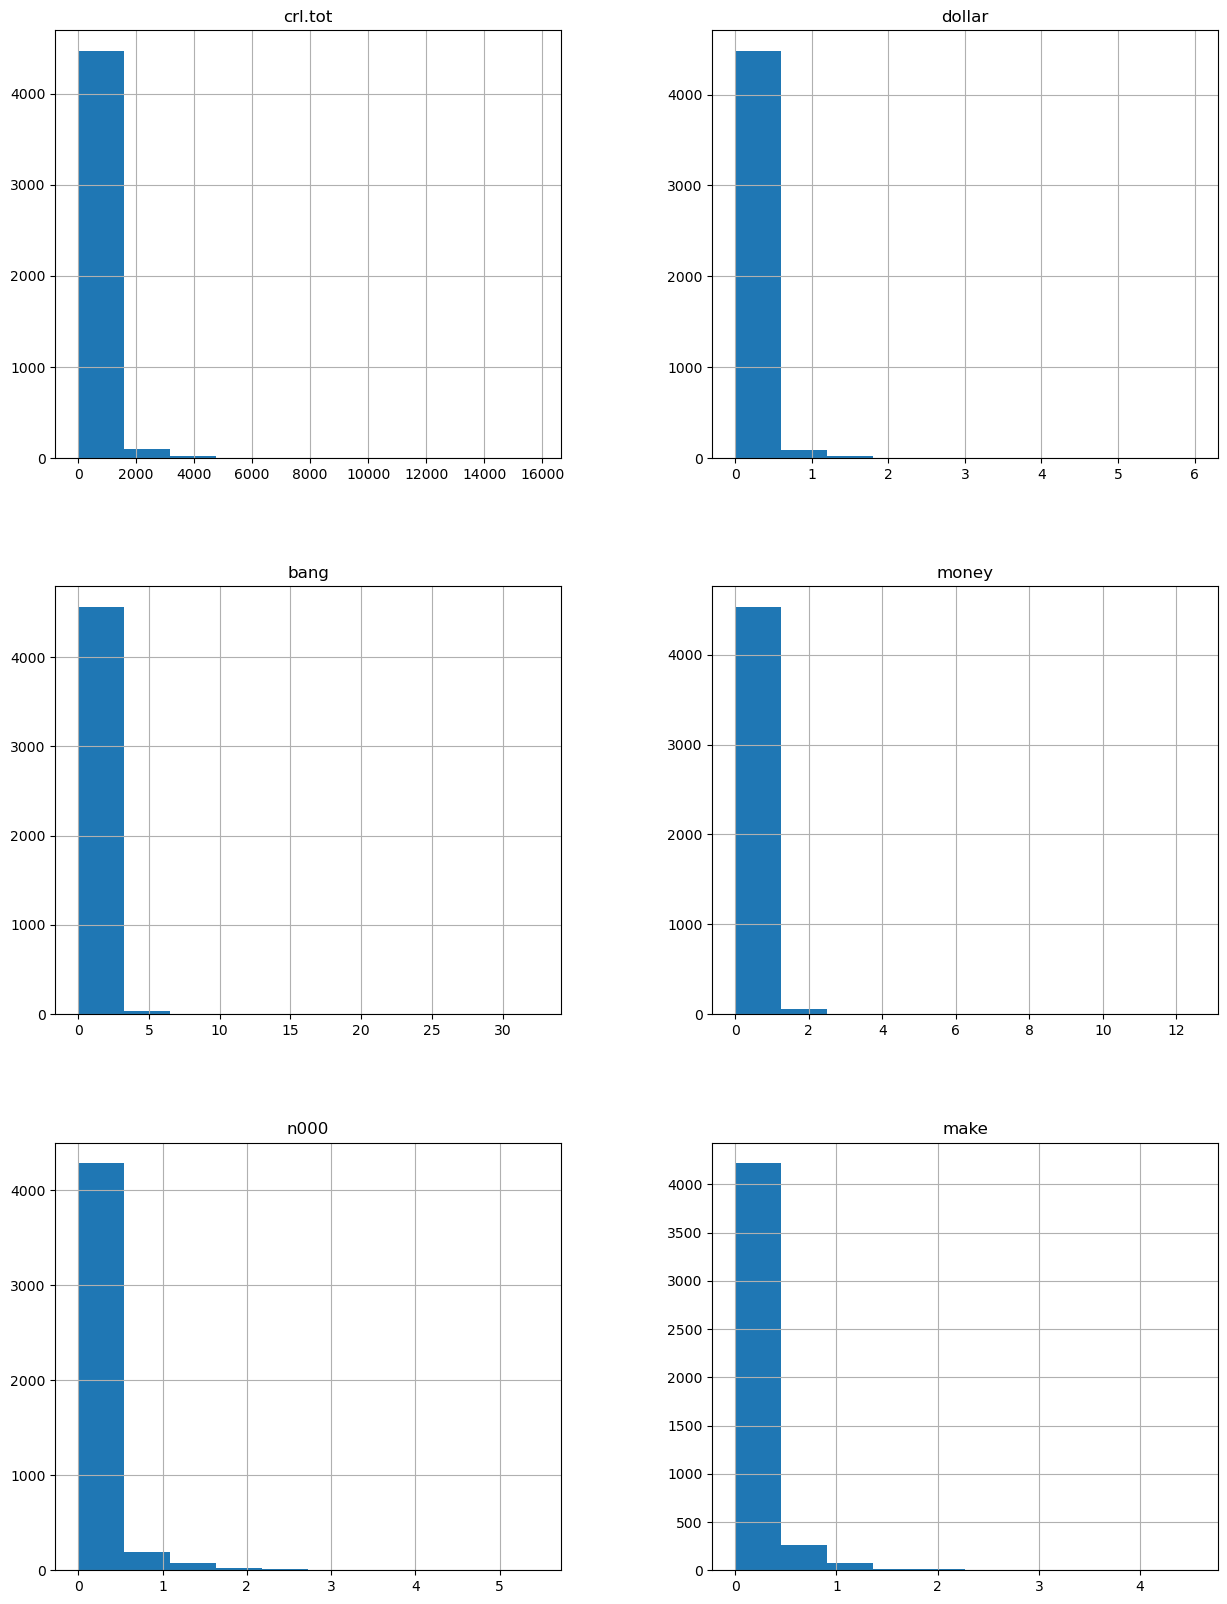

In [67]:
df.hist(figsize = (15,20))

# Removing Outliers

In [68]:
print(len(df))

4601


<AxesSubplot:>

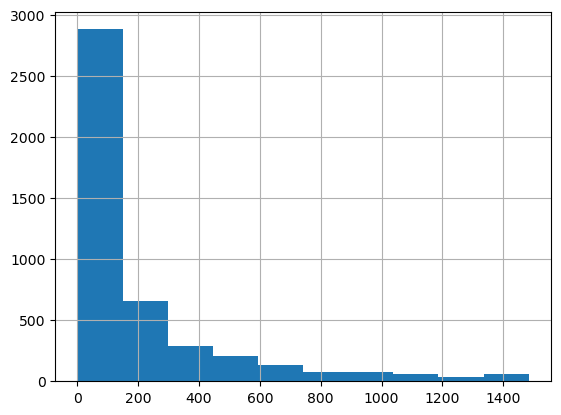

In [69]:
df = df[df['crl.tot'] < 1500]
df['crl.tot'].hist()

<AxesSubplot:>

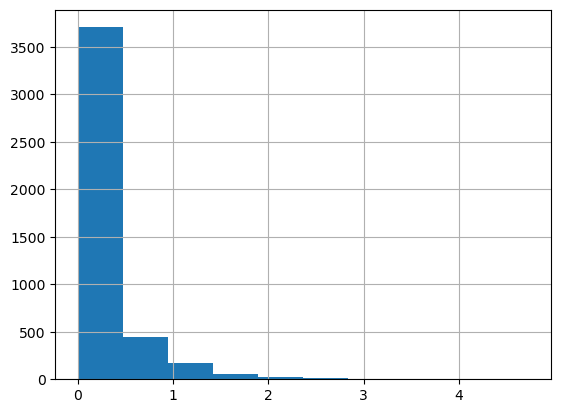

In [70]:
df = df[df['bang'] < 5]
df['bang'].hist()

<AxesSubplot:>

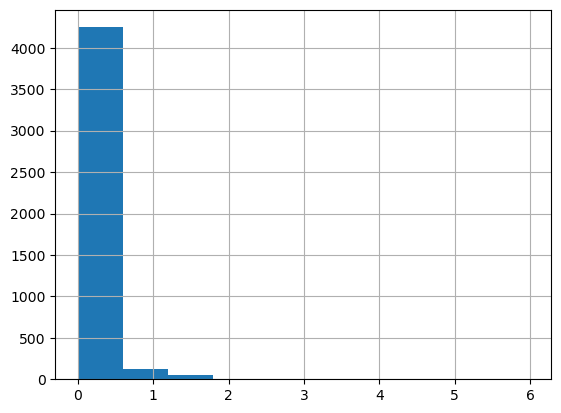

In [71]:
df =  df[df['money'] < 6]
df['money'].hist()

In [72]:
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4432.000000,4432.000000,4432.000000,4432.000000,4432.000000,4432.000000
mean,205.729468,0.066484,0.228118,0.074675,0.093960,0.099059
std,288.775851,0.230603,0.438474,0.278046,0.346232,0.299311
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,238.000000,0.040000,0.289250,0.000000,0.000000,0.000000
max,1484.000000,6.003000,4.733000,5.980000,5.450000,4.340000


<AxesSubplot:>

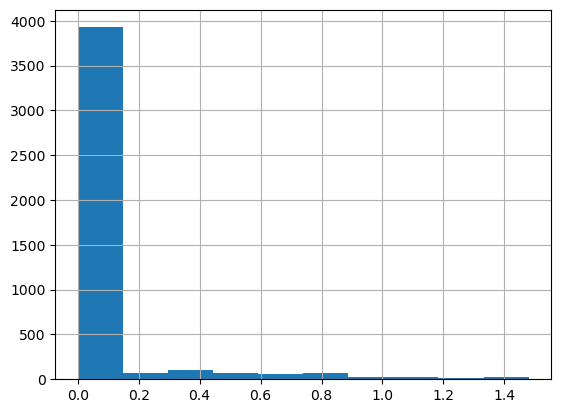

In [73]:
df = df[df['n000'] < 1.5]
df['n000'].hist()

# Correlation matrix

<AxesSubplot:>

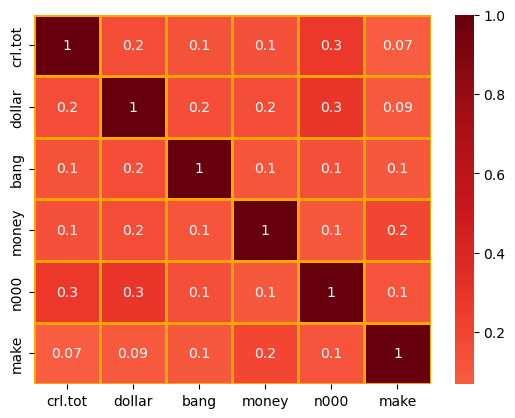

In [74]:
sns.heatmap(df.corr(),
           annot =  True,
           fmt = '.1g',
           center = 0,
           cmap = 'Reds',
           linewidth = 1,
           linecolor = 'orange')

### Checking for multicolinearity.

# Preparing for logistic regression

In [75]:
df['yesno'] = np.where(df['yesno'] == 'y', 1, 0)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,1
1,1028,0.18,0.372,0.43,0.43,0.21,1
3,191,0.00,0.137,0.00,0.00,0.00,1
4,191,0.00,0.135,0.00,0.00,0.00,1
5,54,0.00,0.000,0.00,0.00,0.00,1


In [76]:
y = df.yesno
x = df.iloc[:,:-1] #last column excluded
x = sm.add_constant(x)

In [77]:
y.head()

0    1
1    1
3    1
4    1
5    1
Name: yesno, dtype: int32

In [78]:
x.head()

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21
3,1.0,191,0.00,0.137,0.00,0.00,0.00
4,1.0,191,0.00,0.135,0.00,0.00,0.00
5,1.0,54,0.00,0.000,0.00,0.00,0.00


# Train, test, split

In [79]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

# Logistic regression

In [89]:
y_train

1017    1
430     1
1277    1
3451    0
4467    0
       ..
840     1
1049    1
483     1
4368    0
1654    1
Name: yesno, Length: 3497, dtype: int32

In [90]:
model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.402151
         Iterations 8


In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  yesno   No. Observations:                 3497
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            6
Date:                Fri, 09 Jun 2023   Pseudo R-squ.:                  0.3946
Time:                        08:41:09   Log-Likelihood:                -1406.3
converged:                       True   LL-Null:                       -2322.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1143      0.072    -29.256      0.000      -2.256      -1.973
crl.tot        0.0016      0.000      9.039      0.000       0.001       0.002
dollar         6.1255      0.649      9.439      0.000       4.854       7.397
bang           3.1966      0.181     17.626      0.000       2.841       3.552
money          3.4515      0.369      9.349      0.000       2.728       4.175
n000           3.8836      0.481      8.069      0.000       2.940       4.827
make          -0.0931      0.185     -0.504      0.614      -0.455       0.269
==============================================================================
"""

In [127]:
res = model.summary().tables[1]
res_html = res.as_html()
res_df = pd.read_html(res_html, header = 0, index_col = 0)[0]
res_df

,coef,std err,z,P>|z|,[0.025,0.975]
const,-2.1143,0.072,-29.256,0.000,-2.256,-1.973
crl.tot,0.0016,0.000,9.039,0.000,0.001,0.002
dollar,6.1255,0.649,9.439,0.000,4.854,7.397
bang,3.1966,0.181,17.626,0.000,2.841,3.552
money,3.4515,0.369,9.349,0.000,2.728,4.175
n000,3.8836,0.481,8.069,0.000,2.940,4.827
make,-0.0931,0.185,-0.504,0.614,-0.455,0.269


In [128]:
res_df = res_df.rename(columns={"P>|z|": "P"})
coef_df = res_df.loc[df['P'] < 0.05, ['coef']]
#rename column or use index? 
coef_df

KeyError: 'P'

# Function for reading coefficients 

#### Is this the Odds Ratio (the multiplicative effect of 1 additonal unit of the x variable on the odds of event) ??

In [100]:
def logistic_reader(coef):
    p = round((np.exp(coef) - 1) * 100, 2)
    if p > 0:
        print(f"At coef {coef} the likelihood increases {p}%.")
    elif p == 0:
         print(f"Coef is zero.")
    else: 
         print(f"At coef {coef} the likelihood decreases {p}%.")

In [101]:
logistic_reader(1)

At coef 1 the likelihood increases 171.83%.


In [ ]:
#how to extract coef data from summary and produce a table with corresponding percentages? is this useful? 

#only retaijn coef if the p value is less than 0.05 

#Output will be .... Col 1, Col2, Col 3, Var name, Coef, pc change 